# Matplotlib fundamentals

<div style="max-width: 60ch">

This image is a good reference point when you need to customize different parts of your matplotlib graphs

<img src="https://github.com/kokchun/assets/blob/main/data_visualization/anatomy_figure.webp?raw=true" alt="DESCRIPTION" width="300">

- [data source](https://www.kaggle.com/datasets/dmi3kno/newcarsalesnorway)

</div>


## Exploratory data analysis (EDA)


In [2]:
import pandas as pd
import duckdb

df = pd.read_csv("data/norway_new_car_sales_by_make.csv")
df.head()

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


In [4]:
df_quantity_make = duckdb.query(
    """
             SELECT make, SUM(quantity) as Quantity 
             FROM df 
             GROUP BY make 
             ORDER BY quantity DESC"""
).df()

df_quantity_make.head()

,Make,Quantity
0,Volkswagen,206669.0
1,Toyota,168177.0
2,Volvo,99937.0
3,Ford,99713.0
4,BMW,73315.0


In [5]:
df_quantity_make.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Make      65 non-null     object 
 1   Quantity  66 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [6]:
df["Year"].unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

## Bar charts

### initial chart

- very hard to read
- many car brands that don't get bought too much


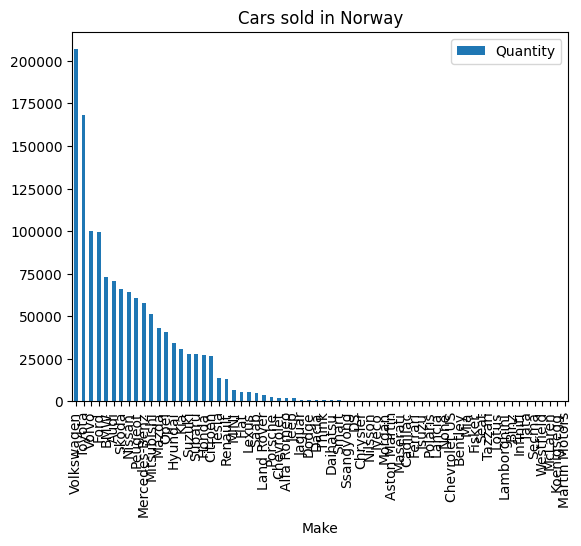

In [7]:
# using dataframes plot method which is a wrapper for matplotlib
ax = df_quantity_make.plot(kind="bar", x="Make", y="Quantity", title = "Cars sold in Norway");

### second iteration 

<div style="max-width: 60ch">
Here we use matplotlib directly instead of dataframe plot, but the same results could be achieved using dataframe plot. Some modifications have been made

- picked out top 10 most sold cars to visualize
- wider figure size to fit the brand names 
- added title, xlabel and ylabel

</div>

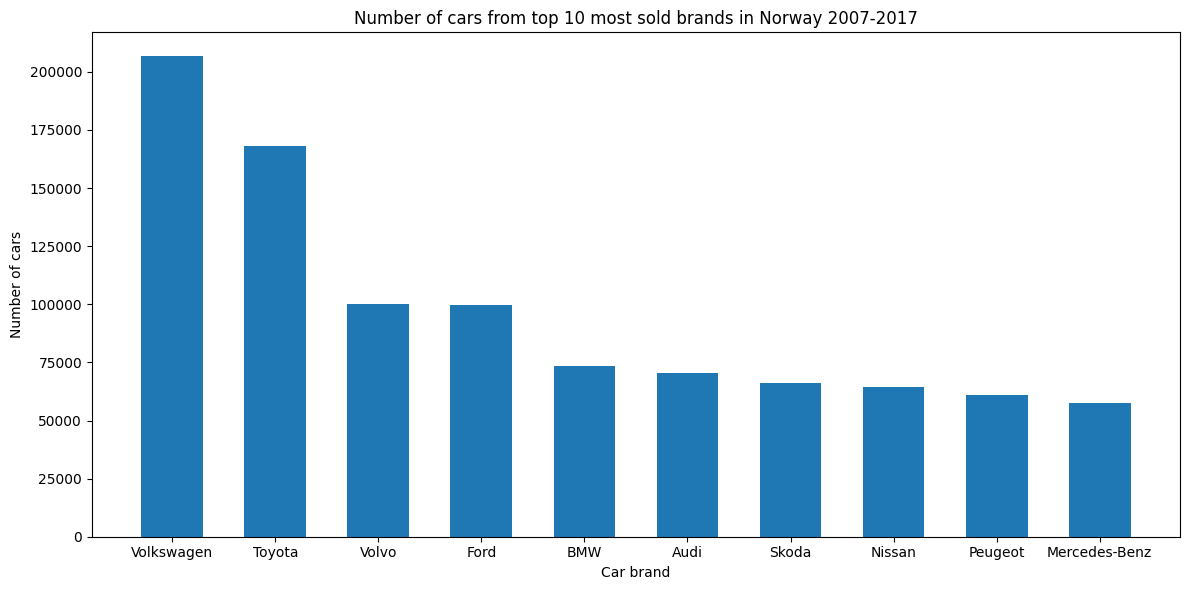

In [16]:
import matplotlib.pyplot as plt


def top_ten_bar():
    df_quantity_make_top_10 = df_quantity_make.iloc[:10]

    fig, ax = plt.subplots(figsize=(12, 6))


    ax.bar(
        x=df_quantity_make_top_10["Make"],
        height=df_quantity_make_top_10["Quantity"],
        width=0.6,
    )

    ax.set(
        title="Number of cars from top 10 most sold brands in Norway 2007-2017",
        xlabel="Car brand",
        ylabel="Number of cars",
    )

    return fig, ax

fig, ax = top_ten_bar();
fig.tight_layout()
fig.savefig("figures/bars_top_10.png")

## Stacked bar 

In [9]:
df_month_make = duckdb.query(
    """
            SELECT year || '-' || LPAD(CAST(month AS VARCHAR),2,'0') AS date, 
                    make, SUM(quantity) AS Quantity FROM df
            WHERE make IN ('Volvo', 'Volkswagen', 'Toyota')
            GROUP BY year, month, make 
            ORDER BY year, month
    """
).df()

# df_month_make.plot(kind = "bar", x = "date", y = "quantity" )
# df_month_make
df_month_make["date"] = pd.to_datetime(df_month_make["date"], format="%Y-%m")
df_month_make_pivot = df_month_make.pivot(index='date', columns='Make', values='Quantity').fillna(0)

df_month_make_pivot.head()

Make,Toyota,Volkswagen,Volvo
date,,,
2007-01-01,2884.0,2521.0,693.0
2007-02-01,1885.0,1517.0,570.0
2007-03-01,1833.0,1428.0,656.0
2007-04-01,1300.0,1257.0,587.0
2007-05-01,1866.0,1934.0,805.0


In [10]:
df_month_make_pivot.loc["2016"]

Make,Toyota,Volkswagen,Volvo
date,,,
2016-01-01,1106.0,1743.0,643.0
2016-02-01,1374.0,2044.0,732.0
2016-03-01,1537.0,2236.0,687.0
2016-04-01,1432.0,3017.0,748.0
2016-05-01,1687.0,2222.0,619.0
2016-06-01,1603.0,2287.0,766.0
2016-07-01,1127.0,2076.0,635.0
2016-08-01,1824.0,2359.0,463.0
2016-09-01,1823.0,2084.0,763.0


In [11]:
months = df_month_make_pivot.loc["2016"].index.month_name()
months

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='date')

[Text(0.5, 1.0, 'Number of cars sold from Toyota, Volkswagen and Volvo in 2016 in Norway'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Number cars')]

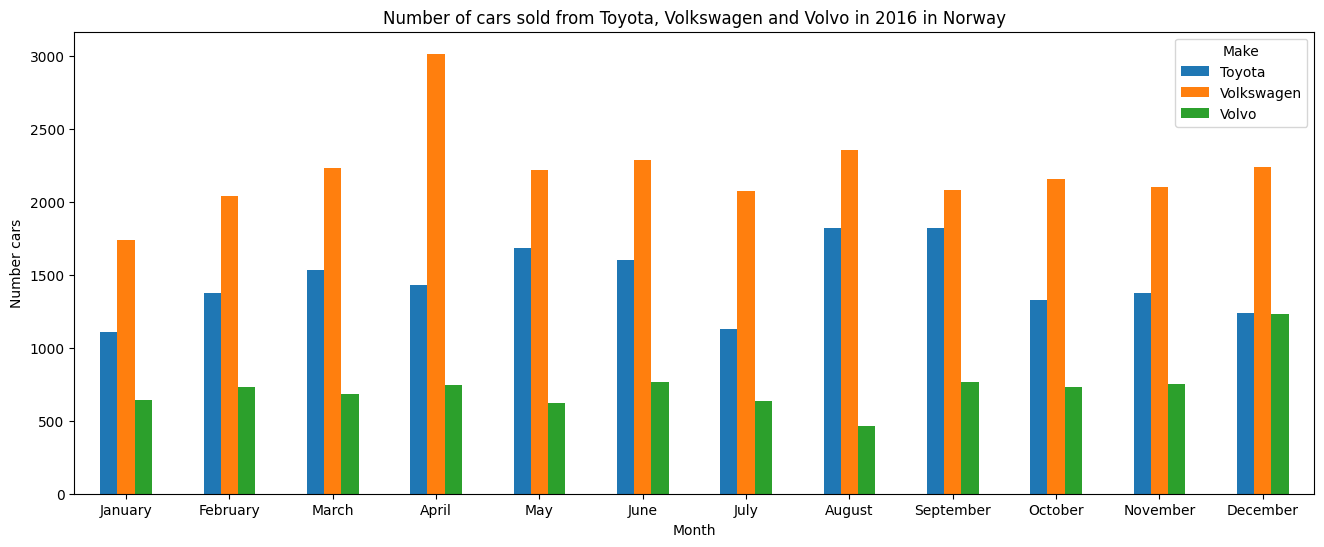

In [12]:
ax = df_month_make_pivot.loc["2016"].plot(kind="bar", figsize=(16, 6))
ax.set_xticklabels(months, rotation=0)
ax.set(
    title="Number of cars sold from Toyota, Volkswagen and Volvo in 2016 in Norway",
    xlabel="Month",
    ylabel="Number cars",
)

## Line charts

use line chart for visualizing continuous variables such as time series to see trends over time 

In [13]:
df_yearly_quantity = duckdb.query(
    """
             SELECT 
                year, SUM(quantity) as Quantity
             FROM df
             GROUP BY year
             ORDER BY year"""
).df()

df_yearly_quantity = df_yearly_quantity.set_index("Year")
df_yearly_quantity

,Quantity
Year,
2007,129195.0
2008,110617.0
2009,98675.0
2010,127754.0
2011,138345.0
2012,137967.0
2013,142151.0
2014,144202.0
2015,150686.0


## inital graph 

<div style="max-width: 60ch">

We notice a sudden drop in 2017, which probably depends on how much data we have in 2017, a high chance is that 2017 wasn't finished yet when extracting the data. Hence it is important to analyze the data and be critical to your results

</div>

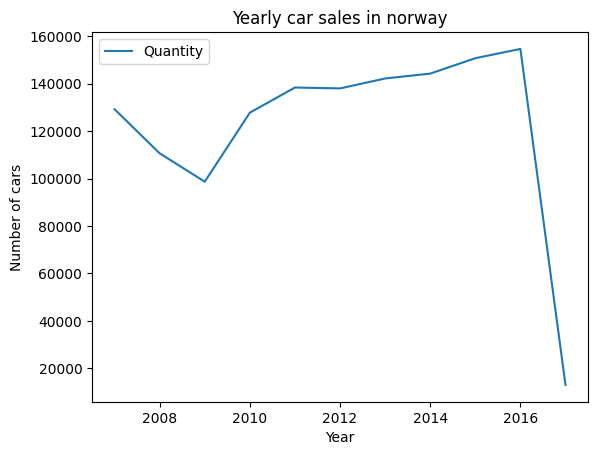

In [14]:
ax = df_yearly_quantity.plot()
ax.set(title="Yearly car sales in norway", ylabel="Number of cars");

## Second iteration

<div style="max-width: 60ch">

Here we make the following changes
- remove last point
- remove legend
- increase thickness of line to make it clearer
- makin dash lines with o markers

</div>

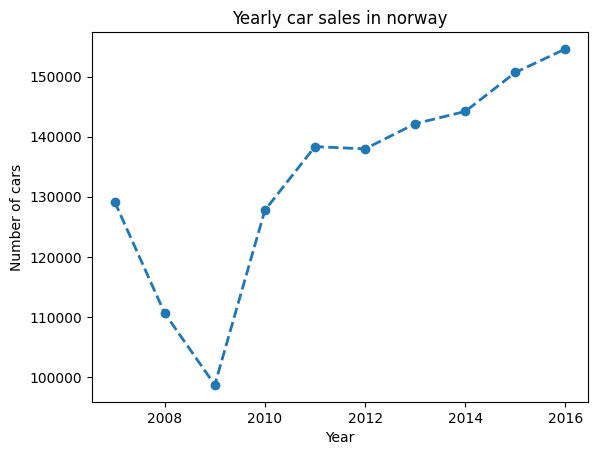

In [15]:
ax = df_yearly_quantity.iloc[:-1].plot(linewidth=2, style='o--')
ax.set(title="Yearly car sales in norway", ylabel="Number of cars")
ax.legend().remove()